## Final Project Submission

Please fill out:
* Student name: HILARY SIMIYU
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog Post URL:  


# OVERVIEW

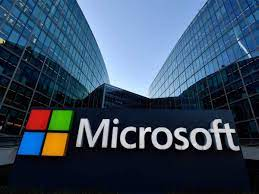




This project will put into application Exploratory Data Analysis to bring about understanding of the specs around Movie Production and Highlight favourable conditions for Microsoft.This will enable Microsoft to understand the pros and cons of creating a new Movie Studio and navigate the market to ensure maximum profits on this investment.
Microsoft can use this analysis to determine the best genre to venture into, favourable languages to produce movies in, appropriate runtime and suitable markets to penetrate  into so as to increase their company's revenue and reach more audiences.

# Business Understanding

To increase its revenue as a company, Microsoft can start a new Movie Studio and use this opportunity to venture into new markets they have never worked in.Doing this will enable Microsoft to reach new audiences and bring about expansion of the business which in turn increases profits of the company and one of the main goals of starting a company is to provide services that will in turn generate financial rewards to the company's stakeholders.


# Objectives

 - Find the genre that is profitable to produce a movie in
 - How much to invest in a movie's production
 - The relationship between a movie's language and its popularity among audiences


To answer these questions we'll breakdown our analysis as follows:

# 1) DATA UNDERSTANDING

For this analysis we are making use of data collected from the following sites:
 * https://www.imdb.com/
 * https://www.boxofficemojo.com/
 * https://www.rottentomatoes.com/
 * https://www.themoviedb.org/
 * https://www.the-numbers.com/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

#### Using pandas we'll open the _'tmdb.movies.csv.gz'_ csv file from the Zipped Data folder and save it in a data frame called movie_data

In [2]:
movie_data = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)

In [3]:
# Displaying the first 5 rows to ensure our data loaded well

movie_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The movie_data contains data about a movie and shows the language it was first produced in ,the release date and its popularity.

Now we'll investigate 
 * what data we have and the corresponding data types of columns
 * discover any missing values in the data set


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


From the code above we now know that:
 - Our movie_data has 9 columns
 - 26517 enteries in our dataset
 - the columns appear to be all full
 

#### Our second data is stored in a zipped sqlite Database.We'll have to first unzip it then create a connection to the database so we can access it.


In [5]:
# import the zipfile module to help unzip the data
import zipfile

#Extract files from 'im.db.zip' to the zipped directory
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall(path='zippedData')
    
# creating a connection to the database
conn = sqlite3.connect('zippedData/im.db')

We'll now read this dataset and extract two tables we are interested in for analysis and assign them to the variables: movie_basics and movie_ratings

In [6]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)

movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

In [7]:
# Displaying the first 5 rows to have an overview of the movie_basics

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


The movie_basics contains data about a movie,the primary title and original title of the movie, the year it was released along with the movie duration and the genre the movie is in .The movie_id is the unique identifier for each movie 

In [8]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


From the code above  we know that:
  * we have 6 columns
  * there are 146144 entries in the dataset
  * movie_id, primary_title, original_title and genres have Object data types whereas start_year and run_time have integers
  
  ##### missing data in movie_basics
​
From the analysis above the original_title, runtime_minutes and genres columns have missing data

In [9]:
# Displaying the first 5 rows  of movie_ratings to have an overview of it

movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This dataset shows the average rating a movie got and the number of votes for the rating.The movie_id is the unique identifier for a movie

In [10]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


From the analysis above
 * We have 3 columns in our dataset
 * The dataset contains 73856 entries
 * there seems to be no missing values

#### Using pandas we'll open our last data, _'tn.movie_budgets.csv.gz'_ csv file from the Zipped Data folder and save it in a data frame called movie_budgets

In [11]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [12]:
# Displaying the first 5 rows of movie_budgets

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


movie_budgets contains data about a movie, its release date the production budget, and what it earned both in the US and globally

In [13]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the code above we get to understand that:
 * the dataset has 6 columns
 * there are 5782 entries 
 * all columns have object data types except for id column
 
 ##### missing data
 From initial observation all columns are full. 
 The data types for some columns may need cleaning too

# 2) DATA CLEANING AND ANALYSIS

After having a clear understanding of the data we are dealing with, we will now put our data cleaning skills to the test and ensure we deal with:
 - missing values
 - duplicate values
 - correct data types
 - correct column names
 
 We will do the data cleaning and also answer the questions this analysis oughts to answer

### Question 1: What Genre to venture into

To answer this question we will make use of our movie_basics and movie_ratings data

First let's merge the two dataframes since they have a common key(movie_id) and assign it to a variable **genres_df**

In [14]:
genres_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

#Display the info about this new joined dataframe
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


We can now check to see if we have missing values in genres_df and get the sum of the total missing values per column

In [15]:
genres_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The runtime_minutes column has a lot of missing values but for this analysis we won't focus on it a lot, so for now we'll keep them as they are and shift our attention to the missing values from the genres column as our analysis majorly lies there.

Let's get a random sample of some of the entries with missing genres 

In [16]:
missing_genre = genres_df[genres_df['genres'].isna()].sample(10, random_state=1)

missing_genre

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
687,tt10161980,Ituzaingo V3rit4,Ituzaingo V3rit4,2019,93.0,None,4.2,5
73034,tt9321572,The Smiling Lombana,The Smiling Lombana,2018,NaN,None,7.8,67
59844,tt6180770,La vida lliure,La vida lliure,2017,90.0,None,5.9,37
22564,tt2336359,Los días,Los días,2012,80.0,None,6.7,9
50442,tt5009014,Hugh Laurie: Live On The Queen Mary,Hugh Laurie: Live On The Queen Mary,2013,84.0,None,8.5,22
27027,tt2608700,Leapfrog: The Magnificent Museum of Opposite W...,Leapfrog: The Magnificent Museum of Opposite W...,2013,68.0,None,7.3,6
9320,tt1754399,Ramanegra,Ramanegra,2010,NaN,None,7.0,5
73384,tt9569306,Bad Girl Avenue,Bad Girl Avenue,2018,81.0,None,5.0,9
63430,tt6767134,Paris est une fête - Un film en 18 vagues,Paris est une fête - Un film en 18 vagues,2017,95.0,None,6.4,28
67844,tt7638100,What a Beautiful Voice,What a Beautiful Voice,2017,NaN,None,8.9,81


Filling the missing values with another value from the column is risky since we won't be able to know if they are the right genre for it. For now lets drop the missing values to ensure the probability of inputing and changing the genres values is small.

In [17]:
# Drop the rows with missing values 
genres_df.dropna(subset=['genres'], inplace=True)

#Assert they are no missing values in the genre column afterward
assert genres_df['genres'].isna().sum() == 0

In [18]:
genres_df['genres'].value_counts()

Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Action,Adventure,Sport             1
History,Music                      1
Family,Music                       1
Biography,Horror                   1
Adventure,Animation,History        1
Name: genres, Length: 923, dtype: int64

Now we will be able to answer the first question._What Genre to venture into_


In [19]:
#Find the 10 most popular genre to make a movie in and assign it to variable genres
genres = genres_df['genres'].value_counts().head(10)
genres

Drama                   11612
Documentary             10313
Comedy                   5613
Horror                   2692
Comedy,Drama             2617
Thriller                 1555
Drama,Romance            1510
Comedy,Romance           1236
Comedy,Drama,Romance     1208
Horror,Thriller          1004
Name: genres, dtype: int64

In [20]:
# creating a list to store the names of the most popular genres
popular_genres = [genre for genre in genres.index]
#create a dataframe to store the mean averagerating for the popular_genres
popular_df = genres_df[genres_df['genres'].isin(popular_genres)].groupby('genres')['averagerating'].mean()
#display the popular_df
popular_df

genres
Comedy                  5.777998
Comedy,Drama            6.364119
Comedy,Drama,Romance    6.292467
Comedy,Romance          5.845631
Documentary             7.293794
Drama                   6.494265
Drama,Romance           6.294305
Horror                  4.835475
Horror,Thriller         4.811554
Thriller                5.704244
Name: averagerating, dtype: float64

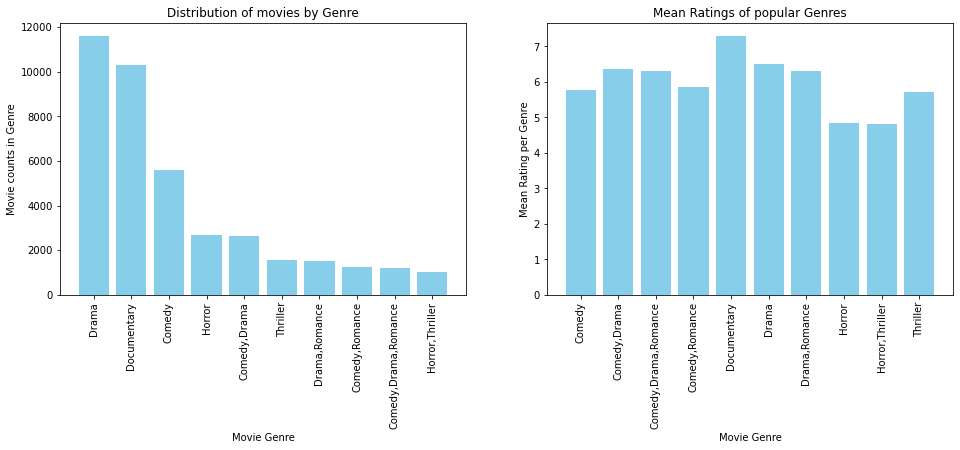

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Plot data
ax1.bar(genres.index, genres.values, color='skyblue')
ax2.bar(popular_df.index, popular_df.values, color='skyblue')

# Customizing the first subplot appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Movie Genre")
ax1.set_ylabel("Movie counts in Genre")
ax1.set_title("Distribution of movies by Genre")

#Customizing the second subplot appearence
ax2.tick_params(axis="x", labelrotation=90)
ax2.set_xlabel("Movie Genre")
ax2.set_ylabel("Mean Rating per Genre")
ax2.set_title("Mean Ratings of popular Genres");


We have plotted to bar graphs to help understand the genre Microsoft should focus more when creating their studio.
The first bargraph shows the 10 most popular genres where movies lie having Drama as the top one, but this alone is not enough to make a decision on.

The second bargraph now analyses these top 10 genres and their ratings based on some votes from **IMDB** website. It shows that the movies with the highest average rating fall in the genres: 'Documentary' followed by 'Drama' then 'Comedy,Drama'.

### Recomendations

Based on our analysis above we can conclude that the best Genre to invest in more is Drama and Documentary since they have  huge number of films being produced in those genres by other studios and their average ratings are the second and first highest respectively. 

## Question 2: How much to Invest in a Movie Production

For this objective we'll make use of our data stored in the movies_budget variable

In [22]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data types for the release_date, production_budget, domestic_gross and worldwide_gross are not properly recorder

Let's clean that first

In [23]:
# Create a function that removes the '$' sign and converts the output to a float
def convert(value):
    cleaned_value = value.replace('$', '').replace(',', '')  # Removes the $ and commas
    return float(cleaned_value)  # Converts result to float 

 let's call our function now and clean the data types for the production budget, domestic gross and worlwide gross



In [24]:
#production budget
movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(convert)
# domestic gross
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(convert)
# worldwide gross
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(convert)


We can now have the data types for _release_date_ from integers to be date

In [25]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

confirming the changes were saved in our movie_budgets dataset

In [26]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


From the code above, it shows that our movie_budget data appears to have no null values.
Lets now check for any duplicates in the dataset

In [27]:
movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

By running the above code we can agree that there are no duplicate values.

Next we'll double check to see if we have any placeholder values in the _movie_ column or if they are unique to each other

In [28]:
movie_budgets['movie'].unique()

array(['Avatar', 'Pirates of the Caribbean: On Stranger Tides',
       'Dark Phoenix', ..., 'Return to the Land of Wonders',
       'A Plague So Pleasant', 'My Date With Drew'], dtype=object)

We can now use our cleaned data for analysis to draw meaningful conclusions from it.

To answer our second question: _How much to Invest in a Movie Production_ we will find the relationshipe between production_budget and total earnings both locally and worldwide

In [29]:
# Create a new column that adds up thedomestic and worldwide gross earnings
movie_budgets['Total_Earnings'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross'] 

#Display the first 5 rows
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Total_Earnings
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


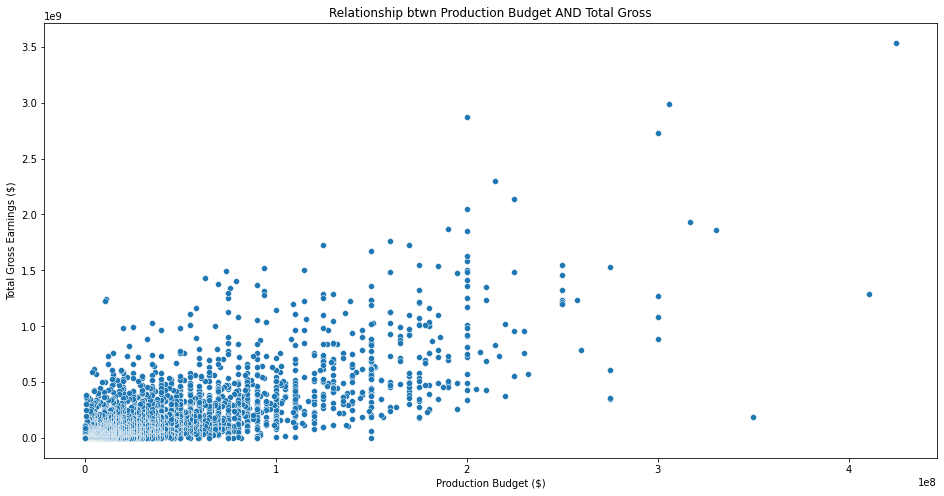

In [30]:
fig, ax = plt.subplots(figsize=(16,8))

sns.scatterplot( 
    x=movie_budgets['production_budget'],
    y=movie_budgets["Total_Earnings"], palette='green')

#Customizing the scatterplot appearance
ax.set_title('Relationship btwn Production Budget AND Total Gross')
ax.set_xlabel('Production Budget ($)')
ax.set_ylabel('Total Gross Earnings ($)');

From the scatter plot above we can see there is a roughly upward slopping patern from left to right. This indicates that Production Budget and Total gross earnings have a positive linear relationship.

By using the illustration above we can deduce that the higher you invest in a movie's production the higher the  total Gross earnings for that movie.


### Recommendations

For higher return from a movie, Microsoft should invest more in the production of the movie.From our data we can see that an average of $350,000,000 put in the production of a movie may gurantee a total earning of over a billion dollars which is a good investment to the company

# Question 3: The relationship Between A Movie Language and Popularity with Audiance

For this objective. we'll make use of our movie_data.

Let's have an overview of it

In [31]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


The data set seems to be full but let's look for duplicate values and drop them from our data set so as to have accurate analysis

In [32]:
# The true values in the output represent number of duplicate values

movie_data.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [33]:
movie_data = movie_data.drop_duplicates()

movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


We will now extract the top 10 languages and clean their names to universally known names and store them in a variable _top languages_

In [34]:
# Get the top 10 languages
top_languages = movie_data['original_language'].value_counts().head(10)


We can see our top languages are 'en', 'fr', 'es' etc. Let's now convert the languages to farmiliar names

In [35]:
# creating a dictionary to store the correct languages names and use it to replace the top_languages data
language_names = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'ru': 'Russian',
    'ja': 'Japanese',
    'de': 'German',
    'zh': 'Chinese',
    'hi': 'Hindi',
    'it': 'Italian',
    'pt': 'Portuguese'
}


In [36]:
movie_data['original_language'] = movie_data['original_language'].replace(language_names)

# repeat the code execution to capture the right names
top_languages = movie_data['original_language'].value_counts().head(10)

top_languages

English       22384
French          483
Spanish         439
Russian         295
Japanese        244
German          231
Chinese         174
Hindi           171
Italian         119
Portuguese       95
Name: original_language, dtype: int64

To fully understand the best language to produce a movie in we will have two visualizations:
 * First one shows the languages with the most movies produced in it. From the count above we can register that English is already the most popular language, so we'll have another chart excluding English
 * Second one shows the language with the best  average ratings from the audiance

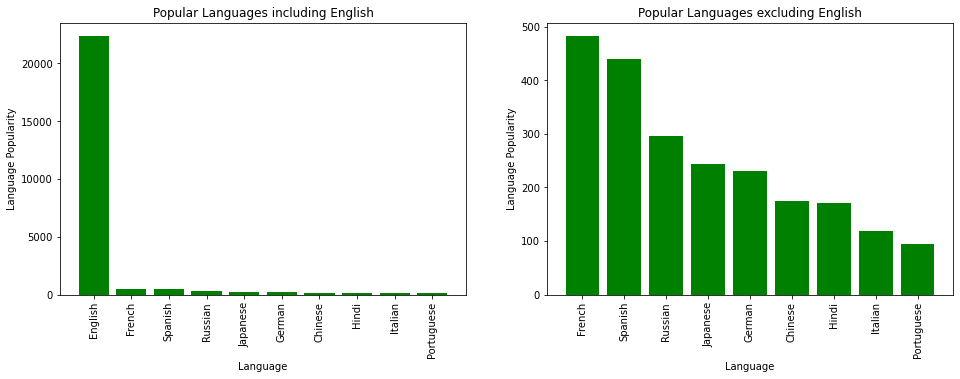

In [37]:
# 1st Plot to show Popular Language
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Plot data
ax1.bar(top_languages.index, top_languages.values, color='green')
ax2.bar(top_languages.index[1:], top_languages.values[1:], color='green')

# Customizing the first subplot appearance
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Language")
ax1.set_ylabel("Language Popularity")
ax1.set_title("Popular Languages including English")

#Customizing the second subplot appearence
ax2.tick_params(axis="x", labelrotation=90)
ax2.set_xlabel("Language")
ax2.set_ylabel("Language Popularity")
ax2.set_title("Popular Languages excluding English");


From the visualization on the left above, it clearly indicates that most Studios create movies in English Language followed by French and Spanish.

The second plot can now clearly show the range between the other movie languages.

Based on the analysis above it is favourable to produce a movie in English since it already has a large audiance but the problem will be there is a steep competeition here. 
Other suitable languages are French, Spanish, Russian and Japanese.
These 5 languages will be the best for Microsoft to indulge in.

Let's go a step further and look at how these languages resonate with their audiance

In [38]:
# creating a list to store the names of the most popular genres
popular_languages = [language for language in top_languages.index]

#create a dataframe to store the mean averagerating for the popular_genres
language = movie_data[movie_data['original_language'].isin(popular_languages)].groupby('original_language')['popularity'].mean()

#display the language dataframe
language

original_language
Chinese       3.679747
English       2.998454
French        4.188834
German        2.897727
Hindi         3.522497
Italian       2.999345
Japanese      5.439041
Portuguese    2.373179
Russian       2.362264
Spanish       2.694150
Name: popularity, dtype: float64

Let's now plot the second graph to show the audiance avarage rating choices on a language

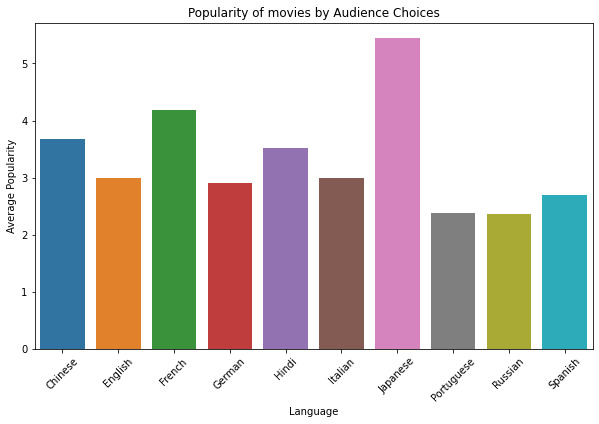

In [39]:
#2nd Plot to show language popularity by audiance pick
plt.figure(figsize=(10, 6))

sns.barplot(x=language.index, y=language.values)

# Customize titles and axis labels
plt.title('Popularity of movies by Audience Choices')
plt.xlabel('Language')
plt.ylabel('Average Popularity')

# Rotate x-axis labels if needed
plt.xticks(rotation=45);

# Show plot
plt.show()

The bar graph above shows the most popular movie languages based on average votes by the audiance.

Japanese movies seem to be most loved by the audiance , followed by French,Chinese and Hindi movies then English movies.
We can get the understanding that these languages except Hindi and Chinese appear to be the most loved since they also appear in our top 5 most popular languages to produce a movie in originally and the popularity with the audiance seems to also be in agreement as they have high average ratings.

### Recommendations

Microsoft should majorly focus on proding movies in the following languages :
* English
* Japanses
* French


# 3) OVERALL RECOMMENDATIONS

After doing our analysis based on the data we had and focusing on a few aspects, to ensure high return on its investment when creating a studio and smooth transition into this new venture Microsoft can make use of this analysis and do the following:

* Produce movies in the Drama and Documentary Genre
* Put an investment of $350,000,000 in the production of a movie
* Produce movies in English, French and Japanese languages